### Installation of files and libraries
- Install spacy and nltk

In [ ]:
#Installation of Libraries and Downloadind of nlp Machine-Learning Model

!pip install pandas
!pip install -U spacy

!python -m spacy download zh_core_web_md

# Move the import statement up here so that it doesn't reinstalled everything everytime a code block runs
import nltk
nltk.download('popular')
nltk.download('tagsets')

     |████████████████████████████████| 6.0 MB 3.7 MB/s 
     |████████████████████████████████| 451 kB 58.0 MB/s 
     |████████████████████████████████| 10.1 MB 32.2 MB/s 
     |████████████████████████████████| 628 kB 51.7 MB/s 
     |████████████████████████████████| 181 kB 59.6 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 79.0 M

True

### Preprocessing Step

- Read the column titled “sentence” in dataset1.txt as well as in dataset2.txt into a single list_of_sentences.
- Filter out "v-noise" from the sentence string elements of the list
- Split list_of_sentences into two different array, one contains only Chinese-major sentences, another contains only English-major sentences.


In [ ]:
# Preprocessing Step

# - Read the column titled “sentence” in dataset1.csv as well as in dataset2.csv into a single list_of_sentences.
# - Filter out "v-noise" from the sentence string elements of the list
# - Split list_of_sentences into two different array, one contains only Chinese-major sentences, another contains only English-major sentences.
# - Output both array as two seperate datasets titled dataset_eng_major.txt and dataset_ch_major.txt

from pandas import *
import re 

#Step 2: read the two csv files into two dataframes by means of the read_csv function
# Use a direct filepath so that when datasets are imported, it won't error
dataframe_1 = read_csv('dataset1.csv') # DONT CHANGE THESE!
dataframe_2 = read_csv('dataset2.csv')
 
#We are reading csv files, not txt files, so we do not employ the open function above, but we can specify the file path in the read_csv function 
#just as we would in the open function, according to the code snipped accessible via the link <https://www.codegrepper.com/code-examples/python/how+to+get+csv+file+path+in+python>.
#Step 3: Convert the column data for "sentence" to list data. Note that dataset1_sentences and dataset2_sentences are of the list data type.
dataset1_sentences = dataframe_1['sentence'].to_list()
dataset2_sentences = dataframe_2['sentence'].to_list()

#Step 4: Concatenate the lists together, and output the list data in the form of a descriptive print statement.
list_of_sentences = dataset1_sentences + dataset2_sentences

# Print the length of list_of_sentences in a f-string formatted text
print(f"The length of list_of_sentences is {len(list_of_sentences)}")

# Remove "v-noise" from each sentence string element of the list MandEng_mixed_sentences via a filer-by-regex technique.
list_of_sentences_no_vnoice = []

for i in range(len(list_of_sentences)):
  # reference string: string element of MandEng_mixed_sentences (i.e., MandEng_mixed_sentences[i])
  MandEng_mixed_sentences_1 = re.sub(r'<v-noise>', " ", list_of_sentences[i])
  list_of_sentences_no_vnoice.append(MandEng_mixed_sentences_1)

# Print the length of list_of_sentences_no_vnoice in a f-string formatted text
print(f"The length of list_of_sentences_no_vnoice is {len(list_of_sentences_no_vnoice)}")

# Verify if the entire dataset contains v-noise 
for i in range(len(list_of_sentences_no_vnoice)):
  if re.search(r'<v-noise>', list_of_sentences_no_vnoice[i]):
    print(f"The sentence {list_of_sentences_no_vnoice[i]} contains <v-noise>")

# Step 5: Split the list_of_sentences_no_vnoice into two different array, one contains only Chinese-major sentences, another contains only English-major sentences.
# If the amount of English words reaches 50% of the total amount of words in the sentence, then the sentence is considered to be English-major.
english_major = []
chinese_major = []

for i in range(len(list_of_sentences_no_vnoice)):
  # get all of the english words in this sentence
  english_words = re.findall(r'[a-zA-Z]+', list_of_sentences_no_vnoice[i])
  # get the amount of words in the current sentence
  sentence_length = len(list_of_sentences_no_vnoice[i].split())
  # If the amount of English words is more than 55% of the total amount of words in the sentence, then the sentence is considered to be English-major.
  if len(english_words) / sentence_length >= 0.55:
    english_major.append(list_of_sentences_no_vnoice[i][1:-1])    #Slicing from [1:-1] removes quotation marks from sentences because quotation marks are string-initial and string-final.
  else:
    chinese_major.append(list_of_sentences_no_vnoice[i][1:-1])    #Slicing from [1:-1] removes quotation marks from sentences because quotation marks are string-initial and string-final.
  
print(f"There are {len(english_major)} English-major sentences in the dataset.")
print(f"There are {len(chinese_major)} Chinese-major sentences in the dataset.")
print(f"Total up to now: {len(english_major) + len(chinese_major)} sentences in the dataset.")

The length of list_of_sentences is 11850
The length of list_of_sentences_no_vnoice is 11850
There are 4691 English-major sentences in the dataset.
There are 7159 Chinese-major sentences in the dataset.
Total up to now: 11850 sentences in the dataset.


### Code-Switching Boundary Detection , Word Tokenization, and Part of Speech Tagging
 	
- Initialize a list titled nlp_processed_sentences to contain all the language-compartmentalized, word tokenized, part of speech-tagged sentences. 
- For each index i in range(len(list_of_sentences)), identify all the boundaries or switching points from English to Mandarin and vice-versa. (Note that we are interested in the part of speech of the word following each switching point.) Then compartmentalize each sentence into all-Mandarin word sequences and all-English word sequences by splitting it at language boundaries before you finally tag the part of speech of every all-Mandarin sequence and tag the part of speech of every all-English sequence.

In [ ]:
# MAKE SURE TO FIRST RUN THE FIRST CODE BLOCK AT THE TOP OF THE PAGE
# Import of Libraries, Packages, and Modules
import spacy
from spacy import displacy
from collections import Counter
import pandas as pd

import re


#Loading of the nlp Machine-Learning Model

nlp = spacy.load('zh_core_web_md')

def compartmentalization_and_word_tokenization_2(sentence):
    """
    Return a list of list of the compartmentalized sentence

    sentence: The input code-switched sentence to be compartmentalized
    """
    sentence_lst = sentence.split()
    sentence_new = [[]]
    compartments = 0
    last_is_chinese = False
    for i in sentence_lst:
        # If last is chinese but current is english, its a switch
        if re.search("[a-zA-Z]+", i) and last_is_chinese:
            sentence_new.append([])
            compartments += 1
            sentence_new[compartments].append(i)
            last_is_chinese = False
        # If last is not chinese and current is chinese, its a switch
        elif not re.search("[a-zA-Z]+", i) and not last_is_chinese:
            sentence_new.append([])
            compartments += 1
            sentence_new[compartments].append(i)
            last_is_chinese = True
        # If last is chinese and current is chinese, continue with the current compartment
        elif not re.search("[a-zA-Z]+", i) and last_is_chinese:
            sentence_new[compartments].append(i)
        # If last is english and current is not chinese, continue with the current compartment
        elif re.search("[a-zA-Z]+", i) and not last_is_chinese:
            sentence_new[compartments].append(i)
        else:
            sentence_new[compartments].append(i)
    return sentence_new

comparmentalized_chinese_major = []
comparmentalized_english_major = []

for i in chinese_major:
    comparmentalized_chinese_major.append(compartmentalization_and_word_tokenization_2(i))

for i in english_major:
    comparmentalized_english_major.append(compartmentalization_and_word_tokenization_2(i))

# Test print the first 10 lines
for i in range(10):
    print(i, comparmentalized_chinese_major[i])

for i in range(10):
    print(i, comparmentalized_english_major[i])


0 [[], ['往', '下', '一', '点']]
1 [[], ['那', '个'], ['wave'], ['比', '较', '慢', '一', '点', '啊']]
2 [['okay'], ['可', '以']]
3 [[], ['讲', '多', '一', '点', '咯', '可', '以']]
4 [['okay']]
5 [['okay'], ['他', '跟', '你', '讲', '了', '啊', '就', '是', '这', '样', '的', '咯', '都', '跟', '你', '讲', '这', '是', '这', '样', '了', '啦', '对', '不', '对']]
6 [[], ['哦', '对', '咯', '好', '再', '继', '续', '再', '讲', '咯']]
7 [[], ['你', '要', '那', '个'], ['chocolate'], ['你', '刚', '才', '吃', '的', '那', '个'], ['chocolate']]
8 [[], ['我', '是', '从'], ['camp'], ['那', '边', '拿', '来', '的', '自', '从'], ['mark'], ['那', '时', '拿', '来', '了', '之', '后']]
9 [[], ['三', '块', '二']]
0 [['yeah']]
1 [['so', 'he']]
2 [['hah']]
3 [['ha']]
4 [['ah', 'hah', 'hah', 'he', 'really', 'did']]
5 [['okay']]
6 [['the', 'knight', 'rider', 'brought', 'down']]
7 [['but', 'then', 'you', "didn't", 'get', 'the', 'rebate']]
8 [['yeah', 'quite', 'lah', 'sort', 'of', 'lah', 'quite', 'lah']]
9 [['clarke', 'quay', 'er'], ['怎', '么', '会'], ['bus'], ['会'], ['broke', 'down']]


### Construct a processed sentence (i.e., a word-tokenized and POS-tagged sentence) from list_of_monolingual_sequences with list comprehension and spaCy/nltk.

In [ ]:
# MAKE SURE TO FIRST RUN THE FIRST CODE BLOCK AT THE TOP OF THE PAGE
# Importation of modules
import spacy
from spacy import displacy
from collections import Counter
import pandas as pd


import nltk
import re

#Loading of the nlp Machine-Learning Model
#Load of the nlp machine-learning model, and allocate it in the variable nlp

nlp = spacy.load('zh_core_web_md')



def POS_Tagger(comp_w_t_sent):
  """
This function annotates a language-compartmentalized, word-tokenized sentence with abbreviated tags symbolic of lexical categories. In effect, it transforms a sentence list of monolingual fragment lists of tokens into a sentence list of monolingual fragment lists of token-tag tuples.
  """
  annotated_comp_w_t_sent = []
  for fragment in comp_w_t_sent:
    #reference string: fragment[0]
    # Ignore empty fragments
    if fragment == []:
        continue
    m = re.search(r'[a-zA-Z]',fragment[0])
    #We do not need to iterate through the token strings of each fragment to annotate them.
    if m == None:#An initial Mandarin word signals an entirely Mandarin fragment.
      #Invoke the nlp model to word-tokenize, and guarantee that the output of the nlp tokenizer is a list.
      reassembled_fragment = " ".join(fragment)
      tokens = nlp(reassembled_fragment)
      tokens = list(tokens)
      tagged_tokens = [(str(s),s.pos_) for s in tokens]
        #We could zip a list of tags and a list of tokens into a dictionary and   extract a list of token-tag tuples from the dictionary, though this would ruin the linear order of words.
      #Append the list of tag-token tuples to the output list.
      annotated_comp_w_t_sent.append(tagged_tokens)
    if type(m) == re.Match:
      #An initial English word signals an entirely English fragment.
      #Call the pos_tag function of nltk. We can forgo the word_tokenize function since the fragment is already word-tokenized.
      tagged_tokens = nltk.pos_tag(fragment)
      #Append the list of tag-token tuples to the output list.
      annotated_comp_w_t_sent.append(tagged_tokens)
  return annotated_comp_w_t_sent

pos_tagged_ch_major = []
pos_tagged_en_major = []

for i in comparmentalized_chinese_major:
    pos_tagged_ch_major.append(POS_Tagger(i))

for i in comparmentalized_english_major:
    pos_tagged_en_major.append(POS_Tagger(i))

# Test print the first 10 lines
for i in range(10):
    print(i, pos_tagged_ch_major[i])

for i in range(10):
    print(i, pos_tagged_en_major[i])

0 [[('往', 'ADP'), ('下', 'DET'), ('一', 'NUM'), ('点', 'NUM')]]
1 [[('那', 'DET'), ('个', 'NUM')], [('wave', 'NN')], [('比', 'ADP'), ('较', 'ADV'), ('慢', 'VERB'), ('一', 'NUM'), ('点', 'NUM'), ('啊', 'PART')]]
2 [[('okay', 'NN')], [('可', 'VERB'), ('以', 'ADP')]]
3 [[('讲', 'VERB'), ('多', 'ADV'), ('一', 'NUM'), ('点', 'NUM'), ('咯', 'PART'), ('可', 'VERB'), ('以', 'ADP')]]
4 [[('okay', 'NN')]]
5 [[('okay', 'NN')], [('他', 'PRON'), ('跟', 'ADP'), ('你', 'PRON'), ('讲', 'VERB'), ('了', 'PART'), ('啊', 'PART'), ('就', 'ADV'), ('是', 'VERB'), ('这', 'DET'), ('样', 'NUM'), ('的', 'PART'), ('咯', 'PART'), ('都', 'ADV'), ('跟', 'ADP'), ('你', 'PRON'), ('讲', 'VERB'), ('这', 'PRON'), ('是', 'VERB'), ('这', 'DET'), ('样', 'NUM'), ('了', 'PART'), ('啦', 'PART'), ('对', 'VERB'), ('不', 'ADV'), ('对', 'VERB')]]
6 [[('哦', 'INTJ'), ('对', 'VERB'), ('咯', 'INTJ'), ('好', 'VERB'), ('再', 'ADV'), ('继', 'ADP'), ('续', 'NOUN'), ('再', 'ADV'), ('讲', 'VERB'), ('咯', 'PART')]]
7 [[('你', 'PRON'), ('要', 'VERB'), ('那', 'DET'), ('个', 'NUM')], [('chocolate', 'N

### Computation of the Number of switched English Nouns, Adjectives, and Verbs

In [ ]:
import re

def eng_number(annotated_comp_w_t_sent):
  """
Absorbing a part of speech-annotated, language-compartmentalized, and word-tokenized list of lists of tuples as an input, this function totals up the number of switched English fragment-initial nouns, switched English fragment-initial adjectives, and switched English fragment-initial verbs, integrating them into a three-element list output.
  """
  eng_number_values = [0,0,0] #Define all value-storing lists prior to the for loop,   so as to not override them with each iteration of the loop.
  # Eliminate the sentence-initial monolingual fragment, which does not follow a code-switching point. 
  # Do not pop data from the list, that will change the original list and cause error
  # annotated_comp_w_t_sent.reverse()
  # first_monolingual_segment = annotated_comp_w_t_sent.pop()
  # annotated_comp_w_t_sent.reverse()
  # Use this code instead
  annotated_comp_w_t_sent_new = annotated_comp_w_t_sent[1:]
  for fragment in annotated_comp_w_t_sent_new:
    #reference string: fragment[0][0]
    m = re.search(r'[a-zA-Z]',fragment[0][0]) #0th component of 0th tuple in list
    if type(m) == re.Match: #An English first word signals an entirely English fragment.
      #Note: lists are mutable, so list indices can be reallocated new values.
      if  fragment[0][1] == 'NN': #1st component of 0th tuple in list
        eng_number_values[0] = eng_number_values[0]+1
      if  fragment[0][1] == 'JJ': #1st component of 0th tuple in list
        eng_number_values[1] = eng_number_values[0]+1
      if  fragment[0][1] == 'VB' or fragment[0][1] == 'VBP' or fragment[0][1] == 'VBZ' or fragment[0][1] == 'VBN' or fragment[0][1] == 'VBD': #1st component of 0th tuple in list
        eng_number_values[2] = eng_number_values[0]+1
    else: #A Mandarin first word signals an entirely Mandarin fragment.
      pass
  return eng_number_values

eng_number_lst = [0,0,0]

#Total up the number of switched entirely English fragment-initial nouns, adjectives, and verbs in the Mandarin-dominated dataset.

# Loop through pos_tagged_ch_major
for i in pos_tagged_ch_major:
    temp = eng_number(i)
    for i in range(3):
        eng_number_lst[i]+= temp[i]
        
print(eng_number_lst)
   
    

[4856, 978, 423]


### Computation of the Number of switched Mandarin Nouns, Adjectives, and Verbs

In [ ]:
def chin_number(annotated_comp_w_t_sent):
  """
Absorbing a part of speech-annotated, language-compartmentalized, and word-tokenized list of lists of tuples as an input, this function totals up the number of switched English fragment-initial nouns, switched English fragment-initial adjectives, and switched English fragment-initial verbs, integrating them into a three-element list output.
  """
  #Eliminate the sentence-initial monolingual fragment, which does not follow a code-switching point.
  # annotated_comp_w_t_sent.reverse()
  # first_monolingual_segment = annotated_comp_w_t_sent.pop()
  # annotated_comp_w_t_sent.reverse()
  # Use this code instead
  annotated_comp_w_t_sent_new = annotated_comp_w_t_sent[1:]
  chin_number_values = [0,0,0] #Define all value-storing lists prior to the for loop, so as to not override them with each iteration of the loop.
  for fragment in annotated_comp_w_t_sent_new:
    #reference string: fragment[0]
    m = re.search(r'[a-zA-Z]',fragment[0][0])
    if m == None: #A Mandarin first word signals an entirely Mandarin fragment.
      #Note: lists are mutable, so list indices can be reallocated new values.
      if  fragment[0][1] == 'NOUN':
        chin_number_values[0]+=1
      if  fragment[0][1] == 'ADJ':
        chin_number_values[1]+=1
      if  fragment[0][1] == 'VERB':
        chin_number_values[2]+=1
    else: #An English first word signals an entirely English fragment.
      pass
  return chin_number_values


#print(chin_number([[('你', 'PRON'), ('要', 'VERB'), ('那', 'DET'), ('个', 'NUM')], [('chocolate', 'NN')], [('你', 'PRON'), ('刚', 'ADV'), ('才', 'ADV'), ('吃', 'VERB'), ('的', 'PART'), ('那', 'DET'), ('个', 'NUM')], [('chocolate', 'NN')], [('你', 'PRON')]]))
#print(chin_number([[('我', 'PRON'), ('是', 'VERB'), ('从', 'ADP')], [('camp', 'NN')], [('那', 'DET'), ('边', 'ADV'), ('拿', 'VERB'), ('来', 'VERB'), ('的', 'PART'), ('自', 'ADV'), ('从', 'VERB')], [('mark', 'NN')], [('那', 'ADV'), ('时', 'PART'), ('拿', 'VERB'), ('来', 'VERB'), ('了', 'PART'), ('之', 'PART'), ('后', 'NOUN')]]))



#Three-element tuples signify the counts of switched Mandarin segment-initial nouns, adjectives, and verbs in a particular sentence.

chin_number_1st = [0,0,0]


#Total up the number of switched entirely Mandarin fragment-initial nouns, adjectives, and verbs in the English-dominated dataset.

for i in pos_tagged_en_major:
  temp = chin_number(i)
  for j in range(3):
    chin_number_1st[j]+=temp[j]


print(chin_number_1st)


[63, 19, 304]


### Create a bar chart or other diagram in excel, colab, etc that can visually illustrate the number of switched words that are adjectives, nouns, and verbs and the number of switched words that are adjectives, nouns, and verbs.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

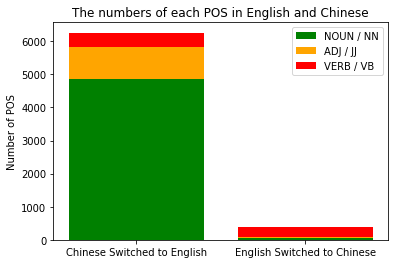

In [ ]:
def bar_chart(eng_number, chin_number):
    left = np.array([1, 2])
    labels = ["Chinese Switched to English", "English Switched to Chinese"]
    nouns_bar = np.array([eng_number[0], chin_number[0]])
    adjs_bar = np.array([eng_number[1], chin_number[1]])
    verbs_bar = np.array([eng_number[2], chin_number[2]])
    p1 = plt.bar(left, nouns_bar, color="green", tick_label = labels)
    p2 = plt.bar(left, adjs_bar, bottom=nouns_bar, color="orange")
    p3 = plt.bar(left, verbs_bar, bottom=adjs_bar+nouns_bar, color="red")
    plt.legend((p1[0], p2[0], p3[0]), ("NOUN / NN", "ADJ / JJ", "VERB / VB"))
    plt.ylabel("Number of POS")
    plt.title("The numbers of each POS in English and Chinese")
    plt.show()

bar_chart(eng_number_lst,chin_number_1st)